In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\baral\OneDrive\ドキュメント\Thyroid_Diff.csv")
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [2]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [4]:
X = data.drop("Recurred", axis=1)
y = data["Recurred"]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop("Recurred", axis=1)
y = data["Recurred"]               

X_scaled = scaler.fit_transform(X)

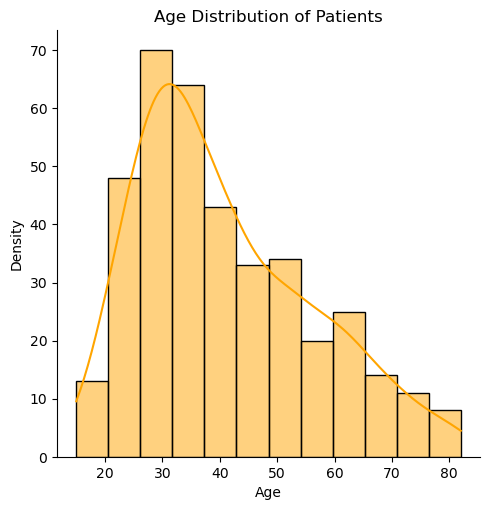

In [6]:
sns.displot(data['Age'], kde=True, color='orange')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

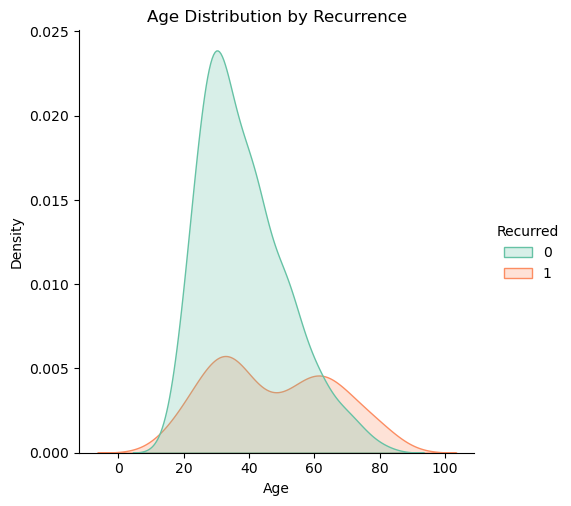

In [7]:
sns.displot(data=data, x='Age', hue='Recurred', kind='kde', fill=True, palette='Set2')
plt.title('Age Distribution by Recurrence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

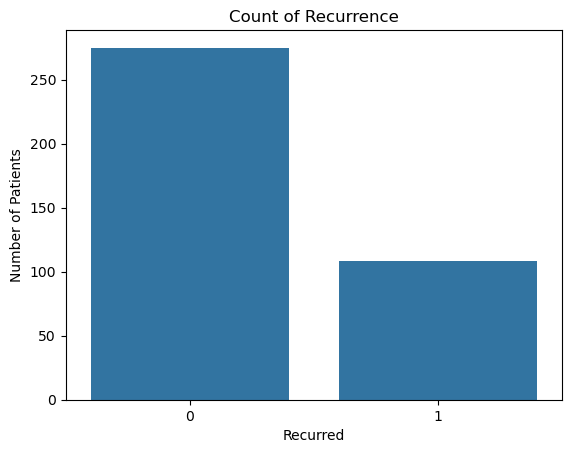

In [8]:
sns.countplot(x='Recurred', data=data)
plt.title('Count of Recurrence')
plt.xlabel('Recurred')
plt.ylabel('Number of Patients')
plt.show()

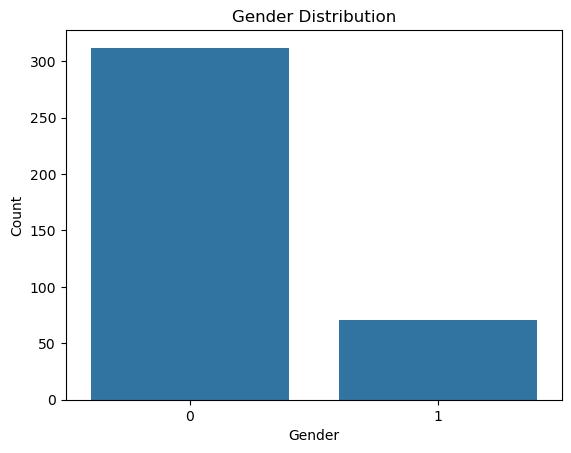

In [9]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

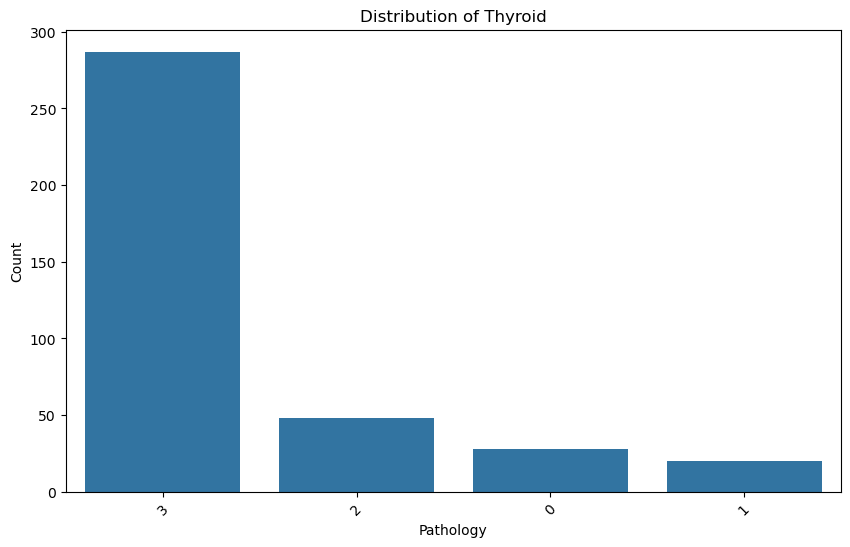

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pathology', data=data, order=data['Pathology'].value_counts().index)
plt.title('Distribution of Thyroid')
plt.xticks(rotation=45)
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show()

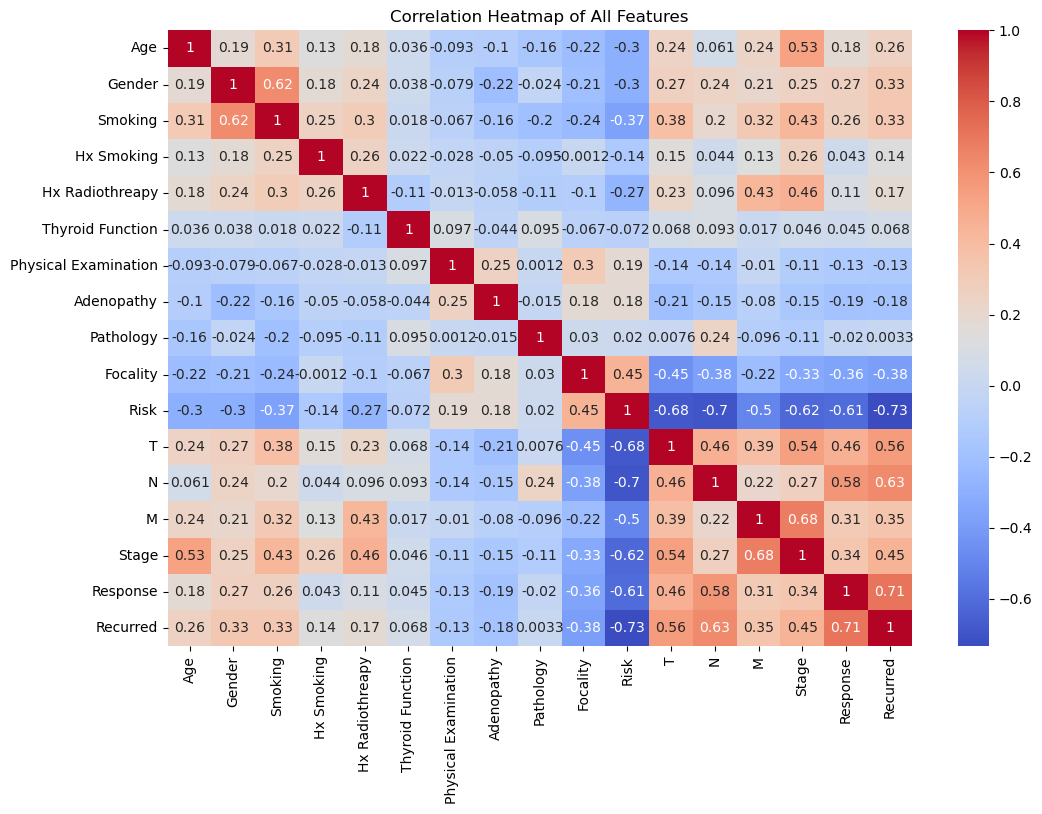

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of All Features")
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop("Recurred", axis=1)  
y = data["Recurred"]               
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))  
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

d:\Users\baral\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
alg1=LogisticRegression()
alg1.fit(x_train,y_train)

LogisticRegression()

In [18]:
from sklearn.tree import DecisionTreeClassifier
alg3 = DecisionTreeClassifier(criterion='entropy')
alg3 = alg3.fit(x_train,y_train)
yp3= alg3.predict(x_test)

In [19]:
from sklearn import metrics
accuracy2 = metrics.accuracy_score(y_test, yp3)
recall2 = metrics.recall_score(y_test, yp3, average='macro')
print("Accuracy Score:", accuracy2)
print("Recall:", recall2)

Accuracy Score: 0.935064935064935
Recall: 0.9392014519056261


In [22]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_test, y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4779 - loss: 0.7336 - val_accuracy: 0.8571 - val_loss: 0.5454
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7820 - loss: 0.5644 - val_accuracy: 0.8961 - val_loss: 0.4405
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7771 - loss: 0.4938 - val_accuracy: 0.9221 - val_loss: 0.3745
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8228 - loss: 0.4137 - val_accuracy: 0.9091 - val_loss: 0.3253
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8306 - loss: 0.4041 - val_accuracy: 0.9091 - val_loss: 0.2905
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8403 - loss: 0.3523 - val_accuracy: 0.9221 - val_loss: 0.2674
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8712 - loss: 0.3232 - val_accuracy: 0.9351 - val_loss: 0.2514
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8851 - loss: 0.2980 - val_accuracy: 0.9351 - v

In [23]:
val_acc = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.9351


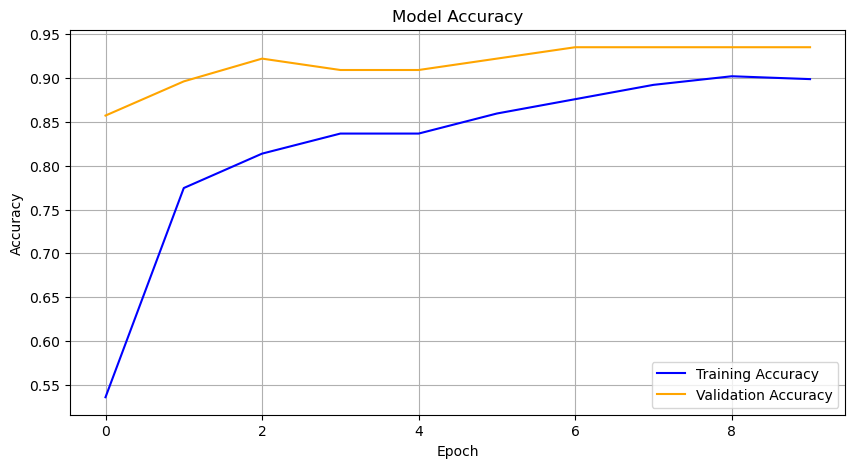

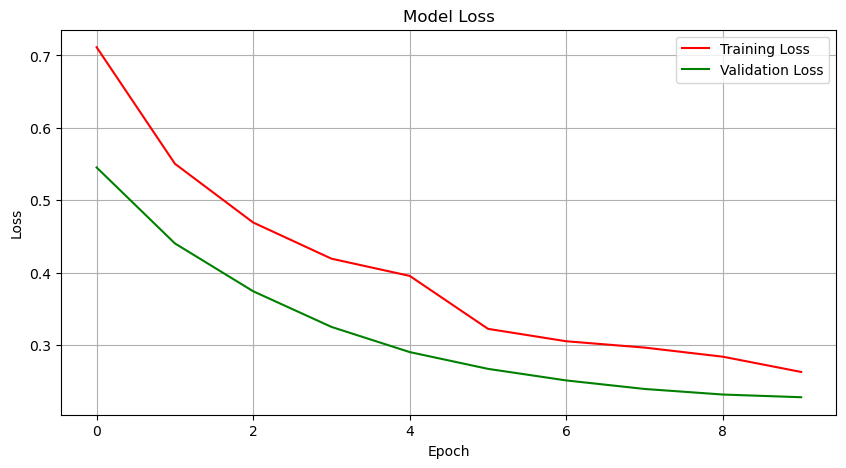

In [24]:
import matplotlib.pyplot as plt

# Training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()